In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import random

In [5]:
!pwd

/catkin_ws/src/notebooks


In [8]:
board_width = 9
board_height = 7
img_size = (1280, 960)
images_glob = '/catkin_ws/src/dataset/calib/calibhd/*.jpeg'

FISHEYE = 'fisheye'
PERSPECTIVE = 'perpective'
MODEL = FISHEYE

In [10]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((board_width*board_height,3), np.float32)
objp[:,:2] = np.mgrid[0:board_width, 0:board_height].T.reshape(-1,2)

objp = np.zeros((1, board_width*board_height, 3), np.float32)
objp[0,:,:2] = np.mgrid[0:board_width, 0:board_height].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob(images_glob)
print('found {} images'.format(len(images)))

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (board_width,board_height), None)
    print("{} - found {} corners".format(fname, len(corners) if ret == True else 0))
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # # Draw and display the corners
        # cv2.drawChessboardCorners(img, (board_width,board_height), corners, ret)
        # #write_name = 'corners_found'+str(idx)+'.jpg'
        # #cv2.imwrite(write_name, img)
        # cv2.imshow('img', img)
        # cv2.waitKey(500)

cv2.destroyAllWindows()

found 75 images
/catkin_ws/src/dataset/calib/calibhd/000066.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000059.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000047.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000078.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000021.jpeg - found 0 corners
/catkin_ws/src/dataset/calib/calibhd/000007.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000052.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000034.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000039.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000057.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000024.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000042.jpeg - found 0 corners
/catkin_ws/src/dataset/calib/calibhd/000073.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000038.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calib

In [11]:
import pickle
ret, mtx, dist, rvecs, tvecs = cv2.fisheye.calibrate(objpoints, imgpoints, img_size,None,None)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration_pickle.p", "wb" ) )

In [16]:
# mtx, dist, rvecs, tvecs

In [13]:
print(mtx)
print("fx:", mtx[0][0])
print("fy:", mtx[1][1])
print("cx:", mtx[0][2])
print("cy:", mtx[1][2])

print('\n\n', dist)
print('k1:', dist[0][0])
print('k2:', dist[0][1])
print('p1:', dist[0][2])
print('p2:', dist[0][3])
print('k3:', dist[0][4])

[[407.43665432   0.         639.5       ]
 [  0.         407.43665432 479.5       ]
 [  0.           0.           1.        ]]
fx: 407.4366543152521
fy: 407.4366543152521
cx: 639.5
cy: 479.5


 [[0.]
 [0.]
 [0.]
 [0.]]
k1: 0.0


IndexError: index 1 is out of bounds for axis 0 with size 1

(960, 1280)


Text(0.5, 1.0, 'Undistorted Image')

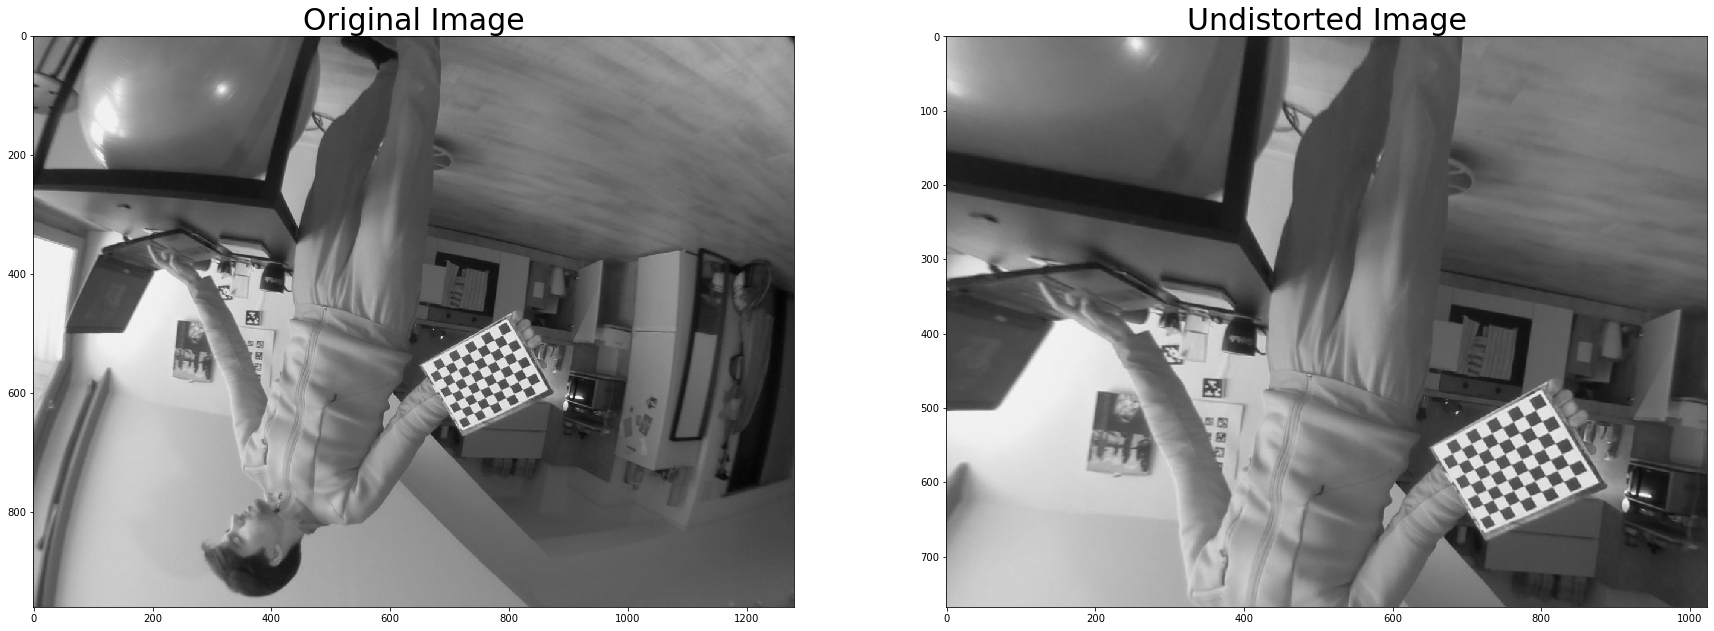

In [48]:
%matplotlib inline

# Test undistortion on an image
img = cv2.imread(random.choice(images))
img_size = (img.shape[1], img.shape[0])
print(img.shape[:2])
# Do camera calibration given object points and image points


if MODEL is FISHEYE:
    DIM=(1024, 768)
    h,w = img.shape[:2]
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
else:
    undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_img)
ax2.set_title('Undistorted Image', fontsize=30)

In [26]:
# from dt_apriltags import Detector

# detector = Detector(searchpath=['/usr/local/lib'],
#                                 families='tag36h11',
#                                 nthreads=3,
#                                 quad_decimate=1.0,
#                                 quad_sigma=0.8,
#                                 refine_edges=1,
#                                 decode_sharpening=0.25,
#                                 debug=0)
img = cv2.imread('calib_imgs/640x480_april/download.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# K = (329.8729619143081, 332.94611303946357, 528.0, 396.0)
# detections = detector.detect(gray, estimate_tag_pose=True, camera_params=K, tag_size=0.05 )
detections = detector.detect(gray, estimate_tag_pose=False)
for det in detections:
    color = (0, 255, 0) 
    pts = np.array(det.corners, np.int32).reshape((-1, 1, 2))
#     print(pts)
    img = cv2.polylines(img, [pts], True, color)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(gray)
ax2.set_title('Undistorted Image', fontsize=30)

ModuleNotFoundError: No module named 'dt_apriltags'

In [27]:
import cv2
# assert cv2.__version__[0] == '3', 'The fisheye module requires opencv version >= 3.0.0'
import numpy as np
import os
import glob
CHECKERBOARD = (7,9)
subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
_img_shape = None
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob(images_glob)
for fname in images:
    img = cv2.imread(fname)
    if _img_shape == None:
        _img_shape = img.shape[:2]
    else:
        assert _img_shape == img.shape[:2], "All images must share the same size."
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    print("{} - found {} corners".format(fname, len(corners) if ret == True else 0))
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)


/catkin_ws/src/dataset/calib/calibhd/000066.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000059.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000047.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000078.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000021.jpeg - found 0 corners
/catkin_ws/src/dataset/calib/calibhd/000007.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000052.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000034.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000039.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000057.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000024.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000042.jpeg - found 0 corners
/catkin_ws/src/dataset/calib/calibhd/000073.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000038.jpeg - found 63 corners
/catkin_ws/src/dataset/calib/calibhd/000014.jpeg -

In [28]:

N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
# rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
# tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rms, _, _, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        gray.shape[::-1],
        K,
        D,
        # rvecs,
        # tvecs,
        flags=calibration_flags,
        # (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )
print("Found " + str(N_OK) + " valid images for calibration")
print("DIM=" + str(_img_shape[::-1]))
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")


Found 72 valid images for calibration
DIM=(1280, 960)
K=np.array([[725.9603523176797, 0.0, 620.3790359526655], [0.0, 727.144659265098, 480.438480942379], [0.0, 0.0, 1.0]])
D=np.array([[-0.0007629959627505978], [-0.07891729340476299], [0.11760143630724404], [-0.06299159500907987]])


In [ ]:
# Found 2 valid images for calibration
DIM=(1280, 960)
K=np.array([[725.7184823825057, 0.0, 677.8743363518034], [0.0, 732.3226573777839, 514.6199423610251], [0.0, 0.0, 1.0]])
D=np.array([[-0.045065368424455986], [-0.3962709133394986], [1.2636672991360378], [-0.8534380089710751]])

In [13]:
print(K)
print("fx:", K[0][0])
print("fy:", K[1][1])
print("cx:", K[0][2])
print("cy:", K[1][2])

print('\n\n', D)
print('k1:', D[0][0])
print('k2:', D[1][0])
print('k3:', D[2][0])
print('k4:', D[3][0])

[[646.43335416   0.         559.96294832]
 [  0.         645.45598732 401.31124907]
 [  0.           0.           1.        ]]
fx: 646.4333541632276
fy: 645.4559873164382
cx: 559.9629483227296
cy: 401.31124906650354


 [[-0.28608956]
 [ 1.16648616]
 [-2.05260645]
 [ 1.23201525]]
k1: -0.2860895557743657
k2: 1.1664861570914238
k3: -2.0526064500572447
k4: 1.232015245693812
